In [ ]:
!git clone https://github.com/evaterry4/DS3001_project.git

Cloning into 'DS3001_project'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 81 (delta 38), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (81/81), 1.65 MiB | 10.78 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [3]:
import pandas as pd
data = pd.read_csv("/content/sample_data/college_data_2022_23 (1).csv")

,UNITID,INSTNM,ZIP,CITY,STABBR,ADM_RATE,PPTUG_EF,GRAD_DEBT_MDN_SUPP,PREDDEG,PCTPELL_DCS_POOLED_SUPP,...,PCTFLOAN_DCS_POOLED_SUPP,C150_4,COSTT4_A,UGDS,MD_EARN_WNE_4YR,CONTROL_PEPS,REGION,ACTCMMID,FEMALE,FAMINC
0,100654,Alabama A & M University,35762,Normal,AL,0.6840,0.0778,31000,3,0.6553,...,0.5365,0.2678,23167.0,5196.0,46562.0,Public,5,18.0,0.5640301318,32362.826114
1,100663,University of Alabama at Birmingham,35294-0110,Birmingham,AL,0.8668,0.1986,22300,3,0.3374,...,0.4214,0.6442,26257.0,12776.0,52404.0,Public,5,27.0,0.6390907397,51306.674306
2,100690,Amridge University,36117-3553,Montgomery,AL,NaN,0.4342,32189,3,0.7769,...,0.5896,0.5000,NaN,228.0,45765.0,Private Nonprofit,5,NaN,0.6486486486,21079.472973
3,100706,University of Alabama in Huntsville,35899,Huntsville,AL,0.7810,0.1612,20705,3,0.2235,...,0.3511,0.6295,25777.0,6985.0,67695.0,Public,5,28.0,0.4763499372,61096.588949
4,100724,Alabama State University,36104-0271,Montgomery,AL,0.9660,0.0771,31000,3,0.6984,...,0.768,0.2773,21900.0,3296.0,37551.0,Public,5,18.0,0.6134185304,31684.382188


In [4]:
#from Siobhan- "I used the built in ai feature to quickly convert all the nummeric variables to numeric"
numeric_columns = data.select_dtypes(include=['number']).columns

for column in numeric_columns:
  data[column] = pd.to_numeric(data[column], errors='coerce')

print(data.dtypes)


UNITID                        int64
INSTNM                       object
ZIP                          object
CITY                         object
STABBR                       object
ADM_RATE                    float64
PPTUG_EF                    float64
GRAD_DEBT_MDN_SUPP           object
PREDDEG                       int64
PCTPELL_DCS_POOLED_SUPP      object
STUFACR                     float64
PCTFLOAN_DCS_POOLED_SUPP     object
C150_4                      float64
COSTT4_A                    float64
UGDS                        float64
MD_EARN_WNE_4YR             float64
CONTROL_PEPS                 object
REGION                        int64
ACTCMMID                    float64
FEMALE                       object
FAMINC                       object
dtype: object


In [ ]:
data['FAMINC'] = pd.to_numeric(data['FAMINC'], errors='coerce')
print(data['FAMINC'].dtype)

float64


In [ ]:
data['FEMALE'] = pd.to_numeric(data['FEMALE'], errors='coerce')
print(data['FEMALE'].dtype)

float64


In [36]:
# additional cleaning after getting errors: converted columns to numeric, forced invalid entries to NaN.
data['COSTT4_A'] = pd.to_numeric(data['COSTT4_A'], errors='coerce')
data['GRAD_DEBT_MDN_SUPP'] = pd.to_numeric(data['GRAD_DEBT_MDN_SUPP'], errors='coerce')
data['FAMINC'] = pd.to_numeric(data['FAMINC'], errors='coerce')
data['PCTPELL_DCS_POOLED_SUPP'] = pd.to_numeric(data['PCTPELL_DCS_POOLED_SUPP'], errors='coerce')
# Remove rows with missing or negative/zero values
filtered_data = data[(data['COSTT4_A'] > 0) & (data['GRAD_DEBT_MDN_SUPP'] > 0)]

# Check
print(filtered_data[['COSTT4_A', 'GRAD_DEBT_MDN_SUPP','FAMINC', 'PCTPELL_DCS_POOLED_SUPP']].describe())

           COSTT4_A  GRAD_DEBT_MDN_SUPP         FAMINC  \
count   2824.000000         2824.000000    2813.000000   
mean   31098.314448        18502.630666   51886.962906   
std    18101.804783         7250.616150   26063.152205   
min     7872.000000         3030.000000    7114.859236   
25%    16220.250000        12000.000000   31295.228346   
50%    25905.500000        20000.000000   46212.187461   
75%    42389.000000        24938.750000   67441.957938   
max    84126.000000        43021.000000  145228.221830   

       PCTPELL_DCS_POOLED_SUPP  
count              2815.000000  
mean                  0.419810  
std                   0.170128  
min                   0.046500  
25%                   0.299750  
50%                   0.403000  
75%                   0.517600  
max                   1.000000  


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

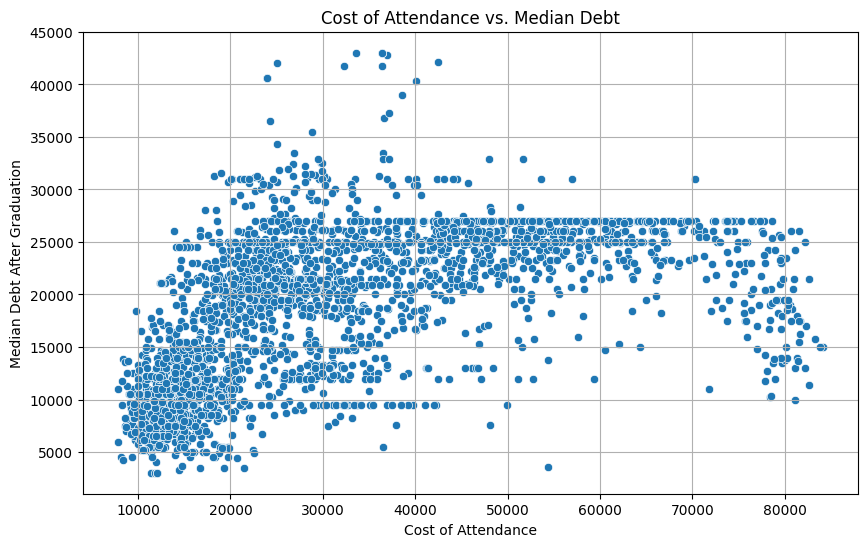

In [14]:
#Scatterplot on the relationship between cost of attendance and debt students incur after graduation.
plt.figure(figsize=(10,6))
sns.scatterplot(x='COSTT4_A', y='GRAD_DEBT_MDN_SUPP', data=filtered_data)
plt.title('Cost of Attendance vs. Median Debt')
plt.xlabel('Cost of Attendance')
plt.ylabel('Median Debt After Graduation')
plt.grid(True)
plt.show()


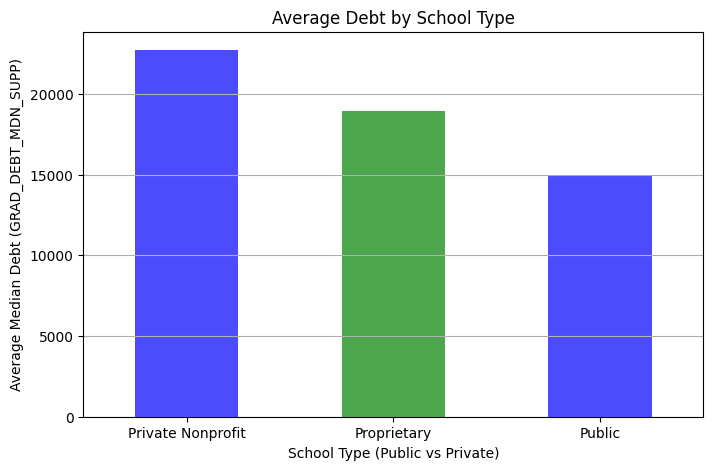

In [18]:
# Group by school type (public vs private) and calculate calculates mean of the GRAD_DEBT_MDN_SUPP column for each group
debt_by_type = filtered_data.groupby('CONTROL_PEPS')['GRAD_DEBT_MDN_SUPP'].mean()

# Grouped bar chart for Average Debt by School Type, used Matplotlib to generate instead of Seaborn
plt.figure(figsize=(8,5))
debt_by_type.plot(kind='bar', color=['blue', 'green'], alpha=0.7)
plt.title('Average Debt by School Type')
plt.xlabel('School Type (Public vs Private)')
plt.ylabel('Average Median Debt (GRAD_DEBT_MDN_SUPP)')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


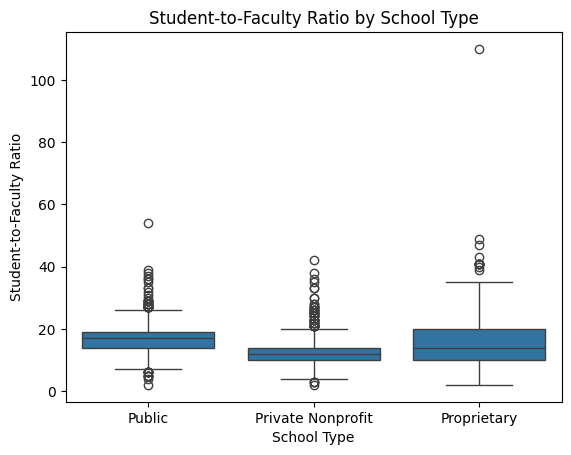

In [21]:
# Box plot of Student-to-Faculty Ratio by School Type
sns.boxplot(x='CONTROL_PEPS', y='STUFACR', data=filtered_data)
plt.title('Student-to-Faculty Ratio by School Type')
plt.suptitle('')
plt.xlabel('School Type')
plt.ylabel('Student-to-Faculty Ratio')
plt.show()


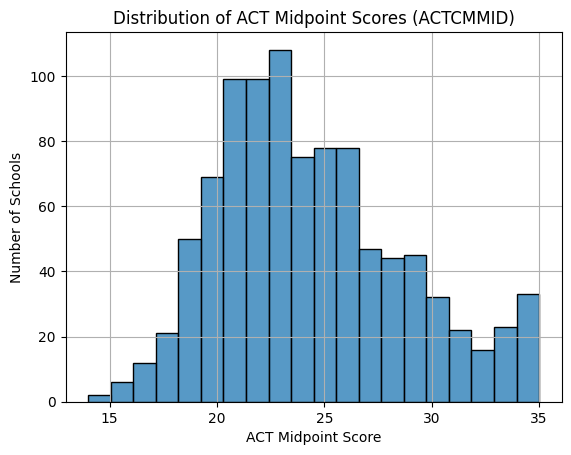

In [23]:
#Histogram of ACT Midpoint Scores
sns.histplot(data=filtered_data, x='ACTCMMID', bins=20)
plt.title('Distribution of ACT Midpoint Scores')
plt.xlabel('ACT Midpoint Score')
plt.ylabel('Number of Schools')
plt.grid(True)
plt.show()


<ipython-input-28-6bcc6e98e671>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['clean_FAMINC'] = pd.to_numeric(filtered_data['FAMINC'], errors='coerce')
<ipython-input-28-6bcc6e98e671>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['clean_COSTT4_A'] = pd.to_numeric(filtered_data['COSTT4_A'], errors='coerce')


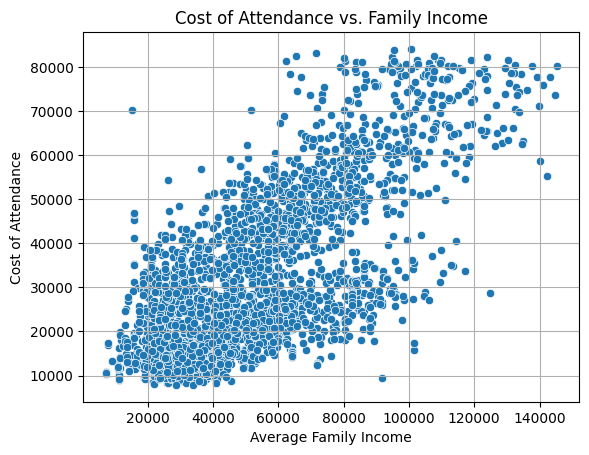

In [31]:
sns.scatterplot(x='FAMINC', y='COSTT4_A', data=filtered_data)
plt.title('Cost of Attendance vs. Family Income')
plt.xlabel('Average Family Income')
plt.ylabel('Cost of Attendance')
plt.grid(True)
plt.show()

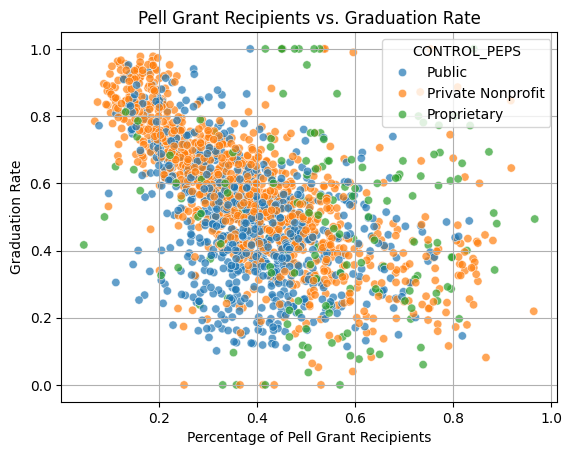

In [38]:
#Scatterplot depicting pell grant recipients vs graduation rate & color coding it by school type
sns.scatterplot(x='PCTPELL_DCS_POOLED_SUPP', y='C150_4', data=filtered_data, hue='CONTROL_PEPS', alpha=0.7)
plt.title('Pell Grant Recipients vs. Graduation Rate')
plt.xlabel('Percentage of Pell Grant Recipients')
plt.ylabel('Graduation Rate')
plt.grid(True)
plt.show()


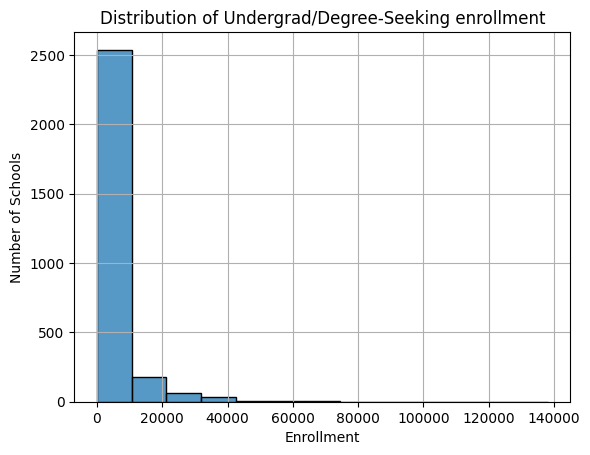

In [43]:
#Distribution of Undergrad/Degree-Seeking enrollment
sns.histplot(data=filtered_data, x='UGDS', bins=13)
plt.title('Distribution of Undergrad/Degree-Seeking Enrollment')
plt.xlabel('Enrollment')
plt.ylabel('Number of Schools')
plt.grid(True)
